In [ ]:
# Step 1: Import libraries
!pip install scikit-learn==1.2.2 joblib==1.2.0


In [ ]:
# Step 2: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Load your dataset
df = pd.read_csv('/student_performance_large_dataset.csv')

# Step 4: Create target variable
df['Pass'] = df['Exam_Score (%)'] >= 50
df['Pass'] = df['Pass'].astype(int)

In [ ]:
# Step 5: Select features for model
features = [
    'Study_Hours_per_Week',
    'Attendance_Rate (%)',
    'Assignment_Completion_Rate (%)',
    'Online_Courses_Completed'
]


print(df.columns.tolist())


['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week', 'Preferred_Learning_Style', 'Online_Courses_Completed', 'Participation_in_Discussions', 'Assignment_Completion_Rate (%)', 'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech', 'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night', 'Final_Grade', 'Pass']


In [ ]:
# Step 2: Create the final DataFrame
df = df[features + ['Pass']]


from sklearn.model_selection import train_test_split
X = df.drop('Pass', axis=1)
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Train the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Precision:", round(precision_score(y_test, y_pred) * 100, 2), "%")
print("Recall:", round(recall_score(y_test, y_pred) * 100, 2), "%")

Accuracy: 69.8 %
Precision: 83.12 %
Recall: 80.02 %


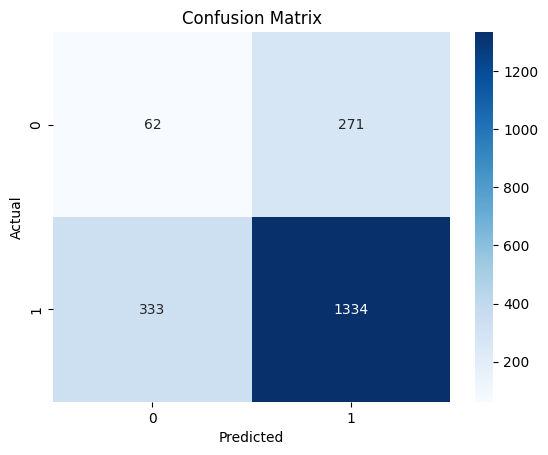

In [ ]:
# Step 6: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [56]:
import joblib

# Save the trained Decision Tree model to a file
joblib.dump(model, 'student_model.pkl')


['student_model.pkl']